# Visualization of different electromagnetic fields

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
%matplotlib notebook

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


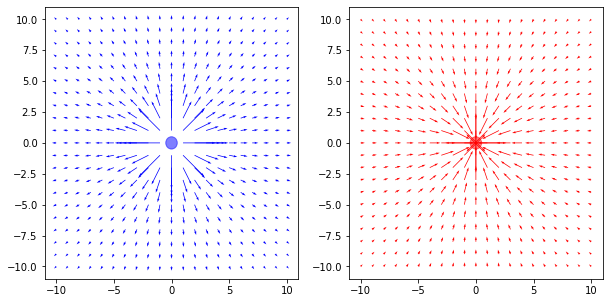

In [2]:
def norm(x, y):
    r = np.sqrt(x**2 + y**2)
    return r

Q_pos = 1
Q_neg = -1

X = np.arange(-10, 11, 1)
Y = np.arange(-10, 11, 1)

U, V = np.meshgrid(X, Y)
r = norm(U,V)
U, V = U/r**2, V/r**2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

charge1 = plt.Circle((0, 0), 0.5, color='b', alpha=0.5)
charge2 = plt.Circle((0, 0), 0.5, color='r', alpha=0.5)

ax1.add_artist(charge1)
ax1.quiver(X, Y, Q_pos*U, Q_pos*V, color='b')

ax2.add_artist(charge2)
ax2.quiver(X, Y, Q_neg*U, Q_neg*V, color='r')

plt.show()


https://stackoverflow.com/questions/6697259/interactive-matplotlib-plot-with-two-sliders
https://matplotlib.org/gallery/index.html#animation
https://matplotlib.org/api/widgets_api.html#module-matplotlib.widgets

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


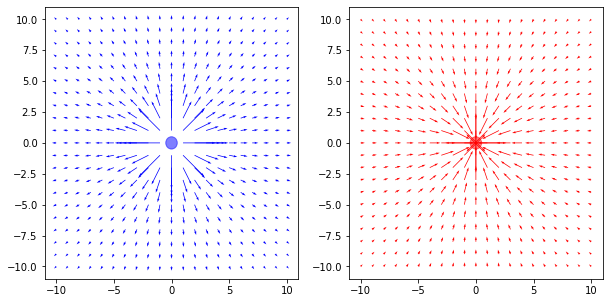

In [3]:
# Make it interactive
def norm(x, y):
    r = np.sqrt(x**2 + y**2)
    return r

Q_pos = 1
Q_neg = -1

X = np.arange(-10, 11, 1)
Y = np.arange(-10, 11, 1)

U, V = np.meshgrid(X, Y)
r = norm(U,V)
U, V = U/r**2, V/r**2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

charge1 = plt.Circle((0, 0), 0.5, color='b', alpha=0.5)
charge2 = plt.Circle((0, 0), 0.5, color='r', alpha=0.5)

ax1.add_artist(charge1)
ax1.quiver(X, Y, Q_pos*U, Q_pos*V, color='b')

ax2.add_artist(charge2)
ax2.quiver(X, Y, Q_neg*U, Q_neg*V, color='r')

plt.show()

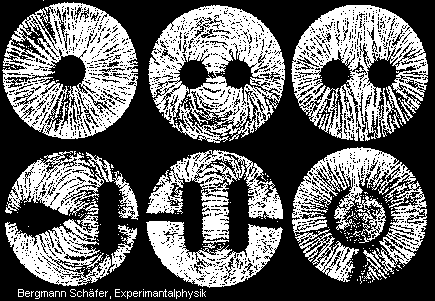

In [48]:
# Electric fields to replicate
from IPython.display import Image
Image(filename = "./img/electric_field.png", width=600)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


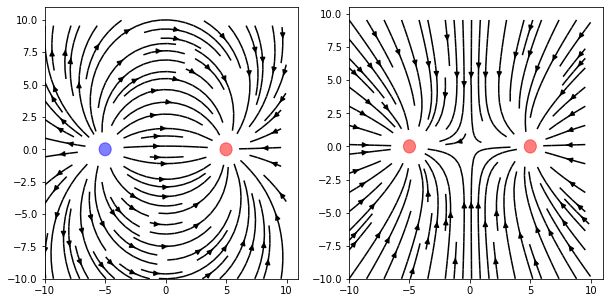

In [4]:
Q_pos = 1
Q_neg = -1

X = np.arange(-10, 11, 1)
Y = np.arange(-10, 11, 1)

U_pos, V_pos = np.meshgrid(X+5, Y)
r_pos = norm(U_pos,V_pos)
U_pos, V_pos = Q_pos*U_pos/r_pos**2, Q_pos*V_pos/r_pos**2

U_neg, V_neg = np.meshgrid(X-5, Y)
r_neg = norm(U_neg,V_neg)
U_neg, V_neg = Q_neg*U_neg/r_neg**2, Q_neg*V_neg/r_neg**2

U_neg2, V_neg2 = np.meshgrid(X+5, Y)
r_neg2 = norm(U_neg2,V_neg2)
U_neg2, V_neg2 = Q_neg*U_neg2/r_neg2**2, Q_neg*V_neg2/r_neg2**2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

charge1 = plt.Circle((-5, 0), 0.5, color='b', alpha=0.5)
charge2 = plt.Circle((5, 0), 0.5, color='r', alpha=0.5)
charge3 = plt.Circle((5, 0), 0.5, color='r', alpha=0.5)
charge4 = plt.Circle((-5, 0), 0.5, color='r', alpha=0.5)

ax1.add_artist(charge1)
ax1.add_artist(charge2)
ax1.streamplot(X, Y, U_pos+U_neg, V_pos+V_neg, color='k')

ax2.add_artist(charge3)
ax2.add_artist(charge4)
ax2.streamplot(X, Y, U_neg2+U_neg, V_neg2+V_neg, color='k')

plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


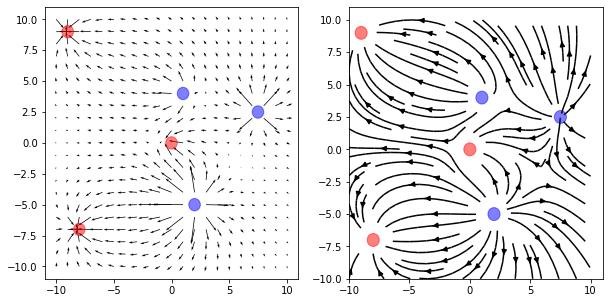

In [5]:
# For n particles

## Set parameters:
Q = [-1, 1, 3, -2, -2, 1.5] # To set
Q_position = [(0,0), (1,4), (2,-5), (-8,-7), (-9,9), (7.5,2.5)] # To set
n = len(Q)

x_min, x_max = -10, 11
y_min, y_max = -10, 11

## Try catch statement to prove if len(Q)==len(Q_position)

## 
X = np.arange(x_min, x_max, 1)
Y = np.arange(y_min, y_max, 1)

def calculate_field_components(X, Y, charge=1, charge_position=(0,0)):
    x_0, y_0 = charge_position
    U, V = np.meshgrid(X-x_0, Y-y_0)
    r = norm(U,V)
    U, V = charge*U/r**2, charge*V/r**2
    return U,V


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

## Initialize electric field
U = 0
V = 0
for i in range(n):
    q = Q[i]
    u_tmp, v_tmp = calculate_field_components(X, Y, q, Q_position[i])
    U += u_tmp
    V += v_tmp
    
    if q>=0:
        ax1.add_artist(plt.Circle(Q_position[i], 0.5, color='b', alpha=0.5))
        ax2.add_artist(plt.Circle(Q_position[i], 0.5, color='b', alpha=0.5))
    else:
        ax1.add_artist(plt.Circle(Q_position[i], 0.5, color='r', alpha=0.5))
        ax2.add_artist(plt.Circle(Q_position[i], 0.5, color='r', alpha=0.5))

ax1.quiver(X, Y, U, V, color='k')
ax2.streamplot(X, Y, U, V, color='k')

plt.show()

In [31]:
# Let's encapsulate that block of code in a function to make discrete approximations of continouos charges

def discrete_particles_field(Q, Q_position):
    n = len(Q)

    x_min, x_max = -10, 11
    y_min, y_max = -10, 11

    ## Try catch statement to prove if len(Q)==len(Q_position)

    ## 
    X = np.arange(x_min, x_max, 1)
    Y = np.arange(y_min, y_max, 1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

    ## Initialize electric field
    U = 0
    V = 0
    for i in range(n):
        q = Q[i]
        u_tmp, v_tmp = calculate_field_components(X, Y, q, Q_position[i])
        U += u_tmp
        V += v_tmp

        if q>=0:
            ax1.add_artist(plt.Circle(Q_position[i], 0.5, color='b', alpha=0.5))
            ax2.add_artist(plt.Circle(Q_position[i], 0.5, color='b', alpha=0.5))
        else:
            ax1.add_artist(plt.Circle(Q_position[i], 0.5, color='r', alpha=0.5))
            ax2.add_artist(plt.Circle(Q_position[i], 0.5, color='r', alpha=0.5))

    ax1.quiver(X, Y, U, V, color='k')
    ax2.streamplot(X, Y, U, V, color='k')

    plt.show()

<IPython.core.display.Javascript object>


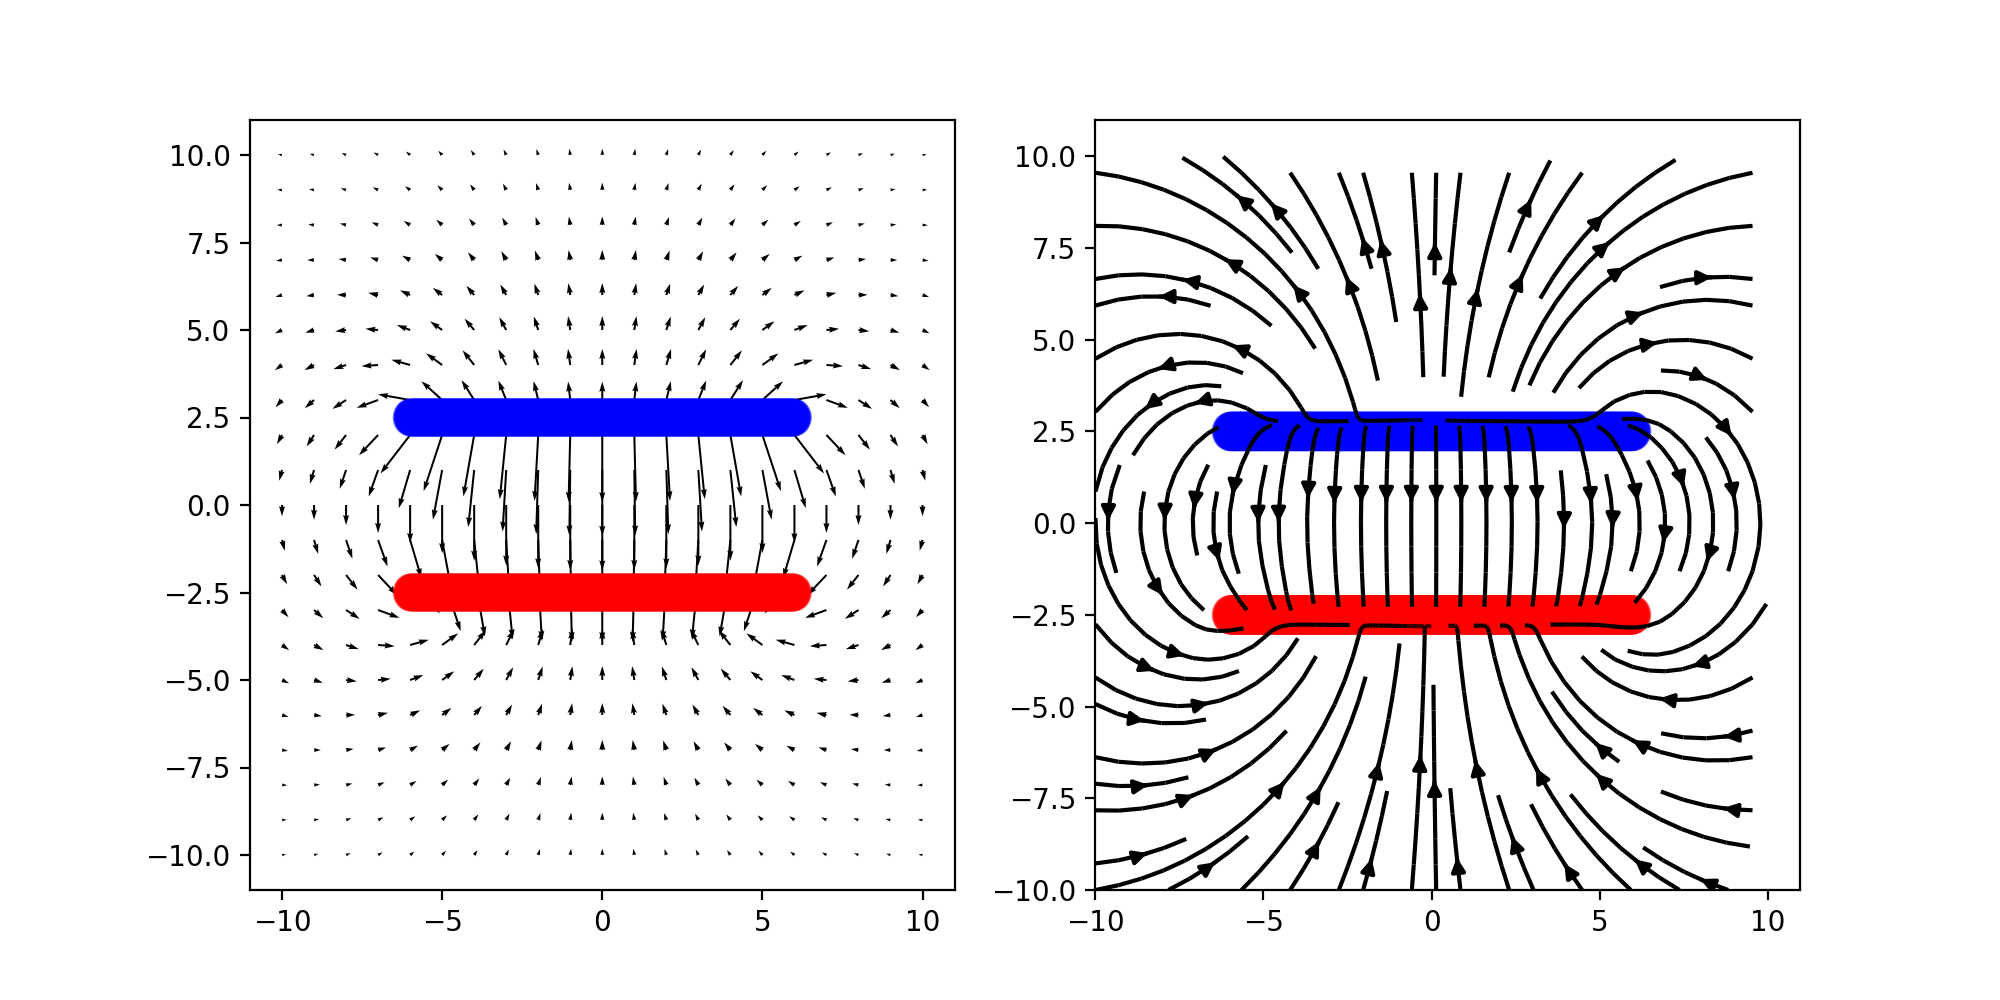

In [44]:
# Charged plates

Q_position_n = [(i, -2.5) for i in np.linspace(-6,6, 500)]
Q_n = [-1]*len(Q_position)

Q_position_p = [(i, 2.5) for i in np.linspace(-6,6, 500)]
Q_p = [1]*len(Q_position)


discrete_particles_field(Q_n+Q_p, Q_position_n+Q_position_p)

<IPython.core.display.Javascript object>


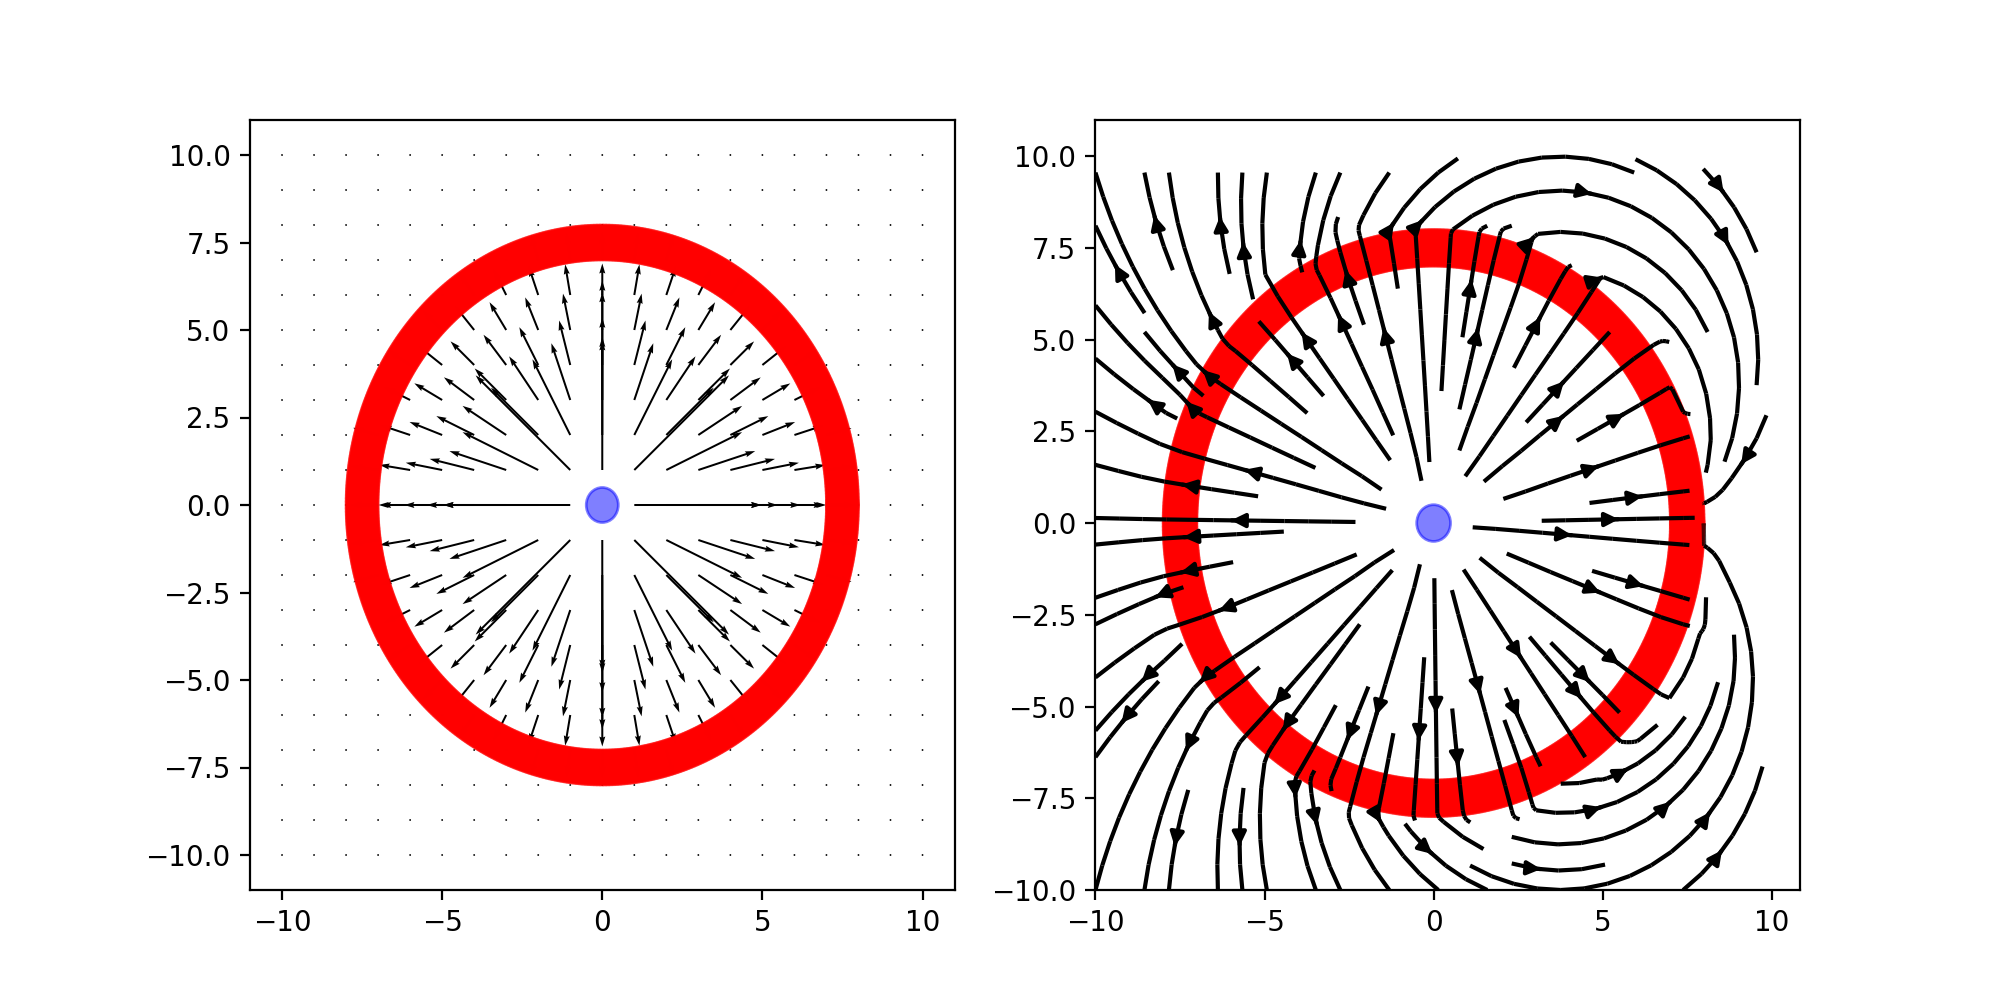

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


In [39]:
# Charged circle with particle in the middle

Q_position = [(7.5*np.cos(i), 7.5*np.sin(i)) for i in np.linspace(0,2*np.pi, 500)] # Circle of radius 7.5
Q = [-1/len(Q_position)]*len(Q_position)

Q_position.append((0,0))
Q.append(1)

discrete_particles_field(Q, Q_position)

<IPython.core.display.Javascript object>


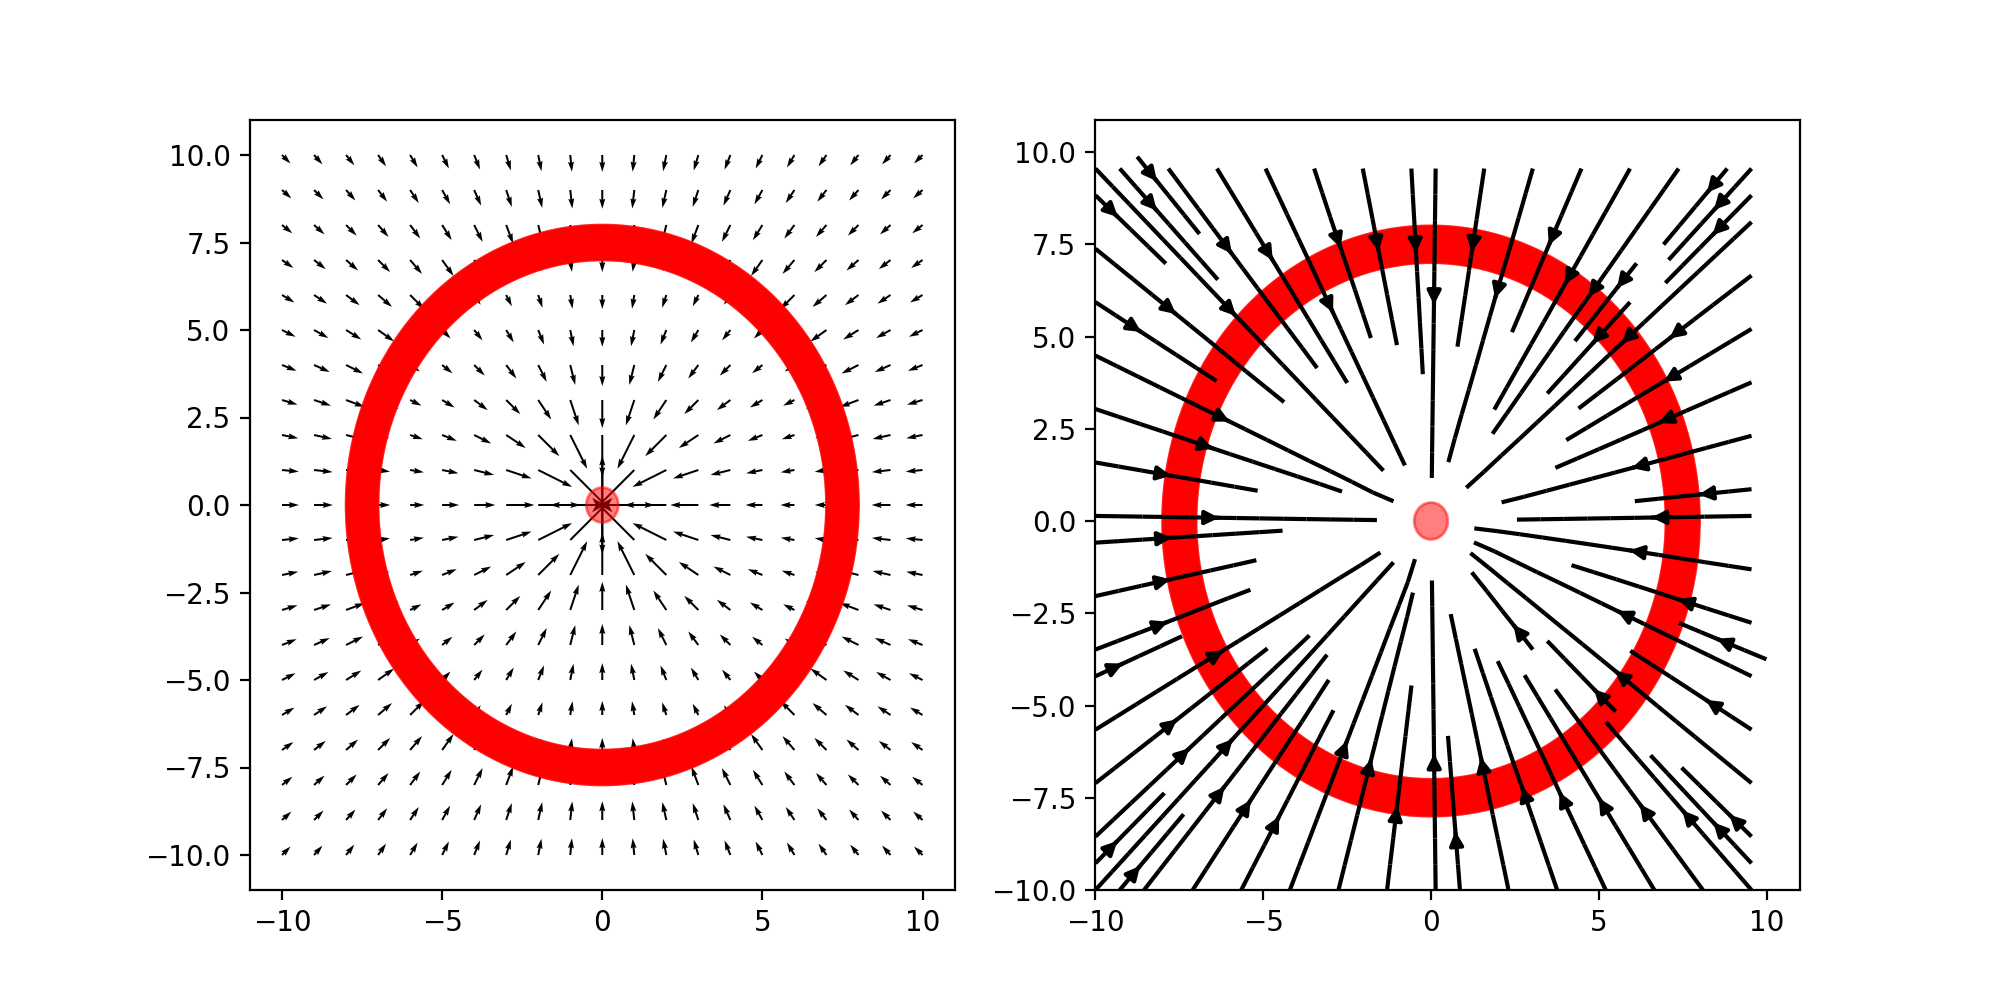

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


In [41]:
Q_position = [(7.5*np.cos(i), 7.5*np.sin(i)) for i in np.linspace(0,2*np.pi, 500)] # Circle of radius 7.5
Q = [-1/len(Q_position)]*len(Q_position)

Q_position.append((0,0))
Q.append(-1)

discrete_particles_field(Q, Q_position)

<IPython.core.display.Javascript object>


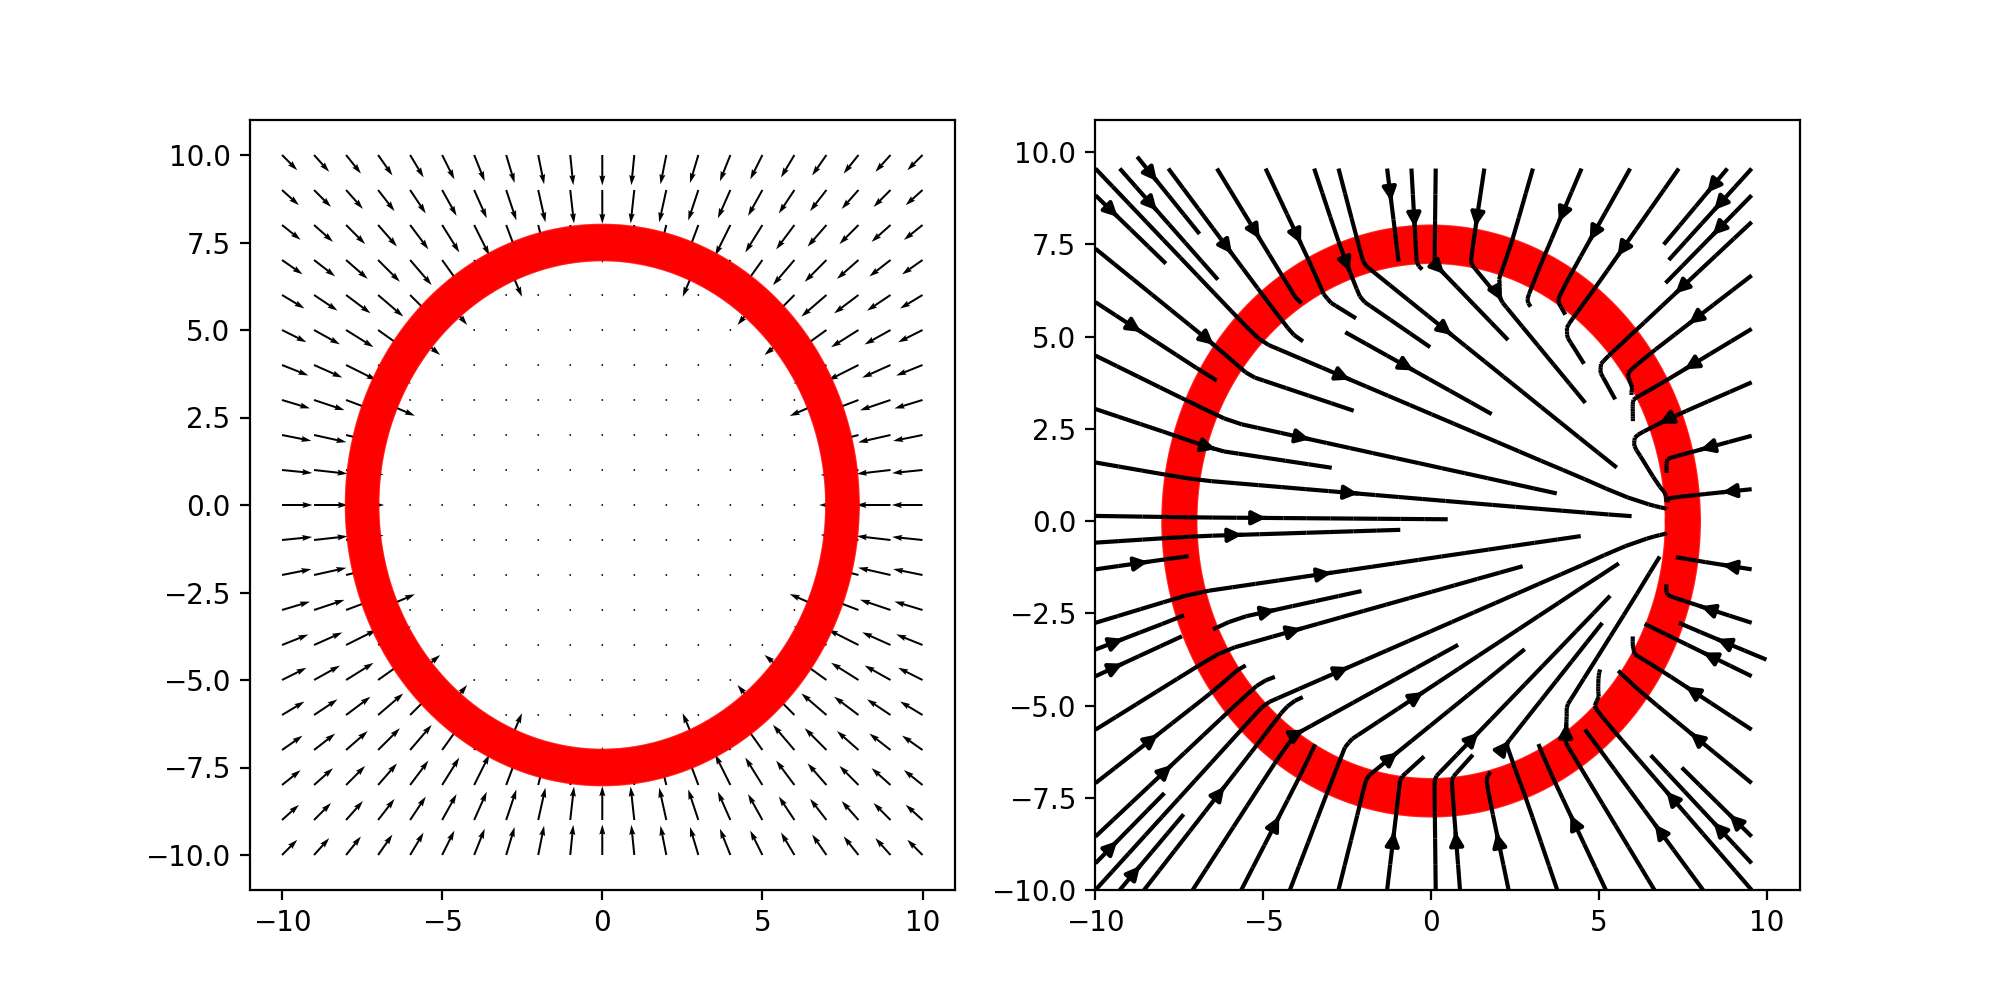

In [42]:
Q_position = [(7.5*np.cos(i), 7.5*np.sin(i)) for i in np.linspace(0,2*np.pi, 500)] # Circle of radius 7.5
Q = [-1/len(Q_position)]*len(Q_position)

discrete_particles_field(Q, Q_position)

<IPython.core.display.Javascript object>


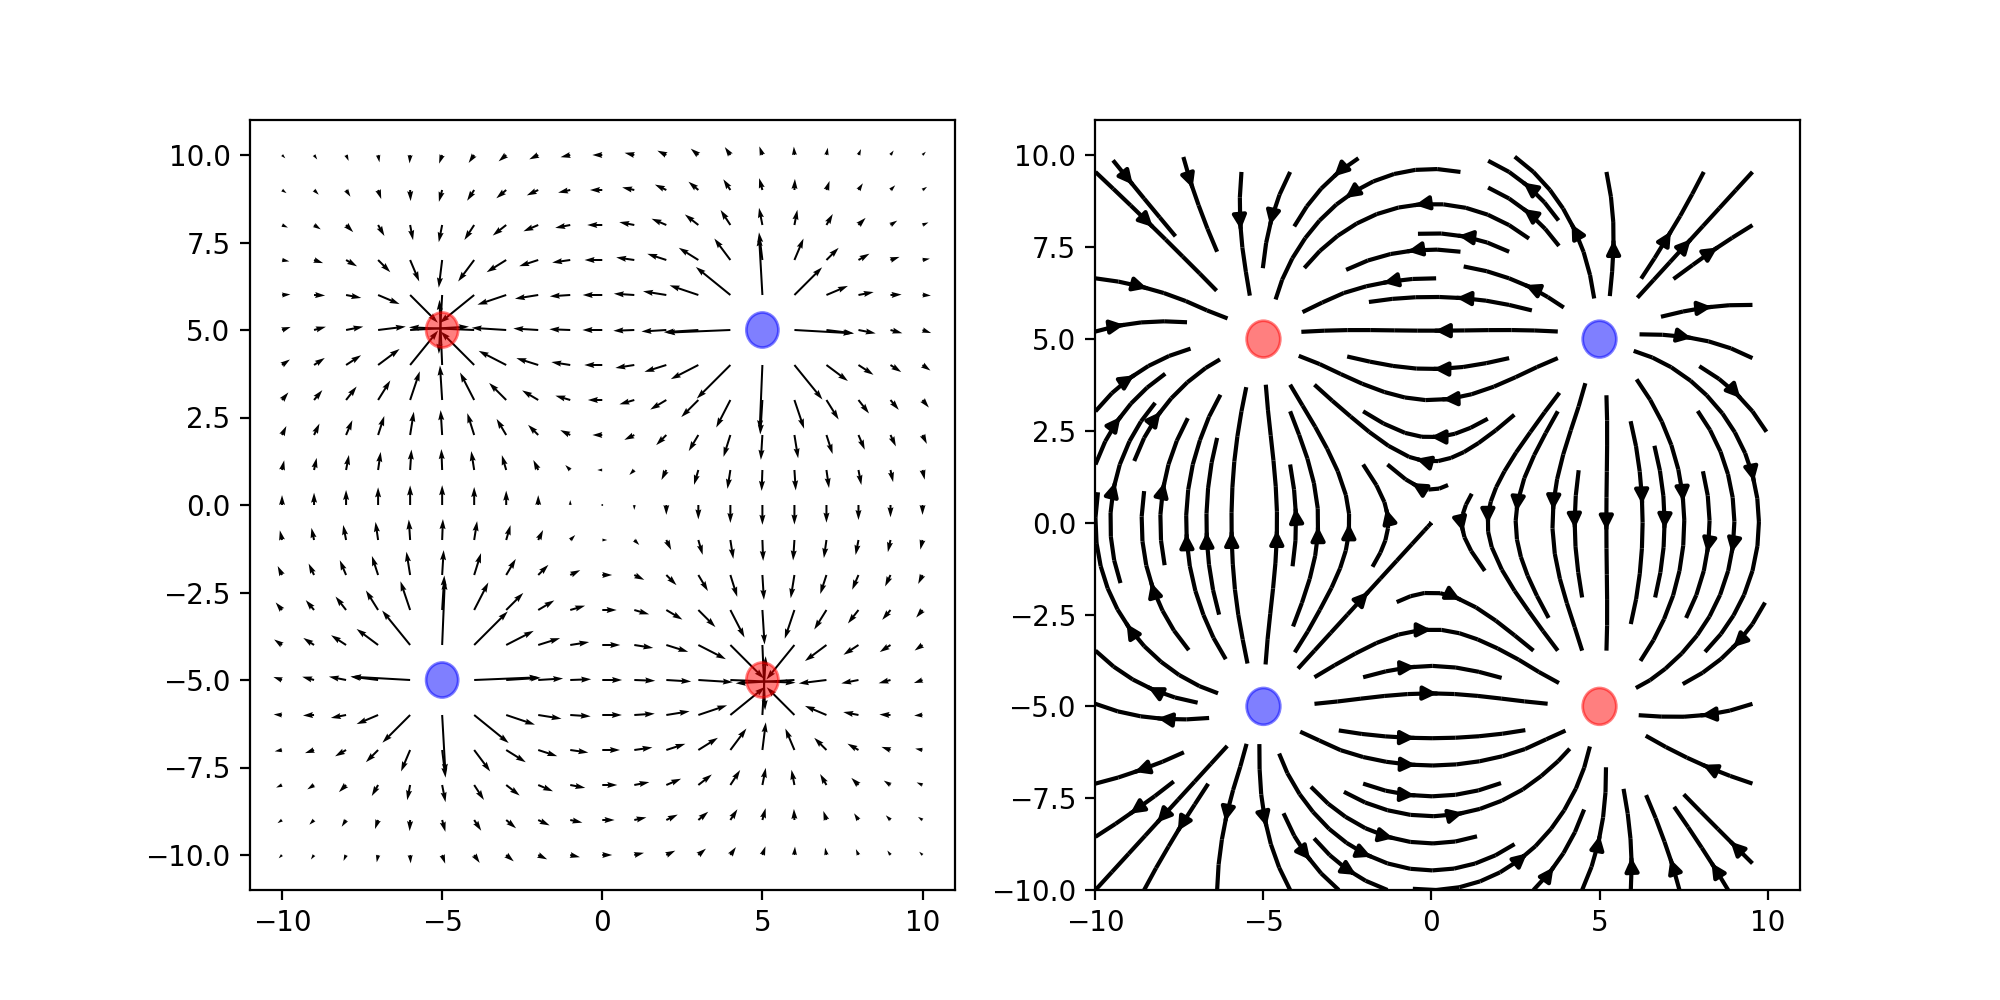

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


In [65]:
# Introduce Quadrupolentwicklung and, if possible, make animation of alternating charges to introduce Penning Trap

Q_position = [(5,-5)]
Q = [-1]
Q_position.append((-5,5))
Q.append(-1)
Q_position.append((-5,-5))
Q.append(1)
Q_position.append((5,5))
Q.append(1)

discrete_particles_field(Q, Q_position)